In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Set style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# For NER: CoNLL-2003 (English) - For Text Classification: AG News

In [4]:
from datasets import load_dataset

# Load NER dataset
ner_dataset = load_dataset("conll2003")

# Load text classification dataset
text_classification_dataset = load_dataset("ag_news")

# Basic exploration
print("NER Dataset:")
print(ner_dataset)
print("\nSample NER instance:")
print(ner_dataset["train"][0])

print("\nText Classification Dataset:")
print(text_classification_dataset)
print("\nSample Text Classification instance:")
print(text_classification_dataset["train"][0])

README.md:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

conll2003.py:   0%|          | 0.00/9.57k [00:00<?, ?B/s]

The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

NER Dataset:
DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

Sample NER instance:
{'id': '0', 'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7], 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0], 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}

Text Classification Dataset:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

Sample Text Classification instance:
{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reute

# 1. NER Dataset Analysis


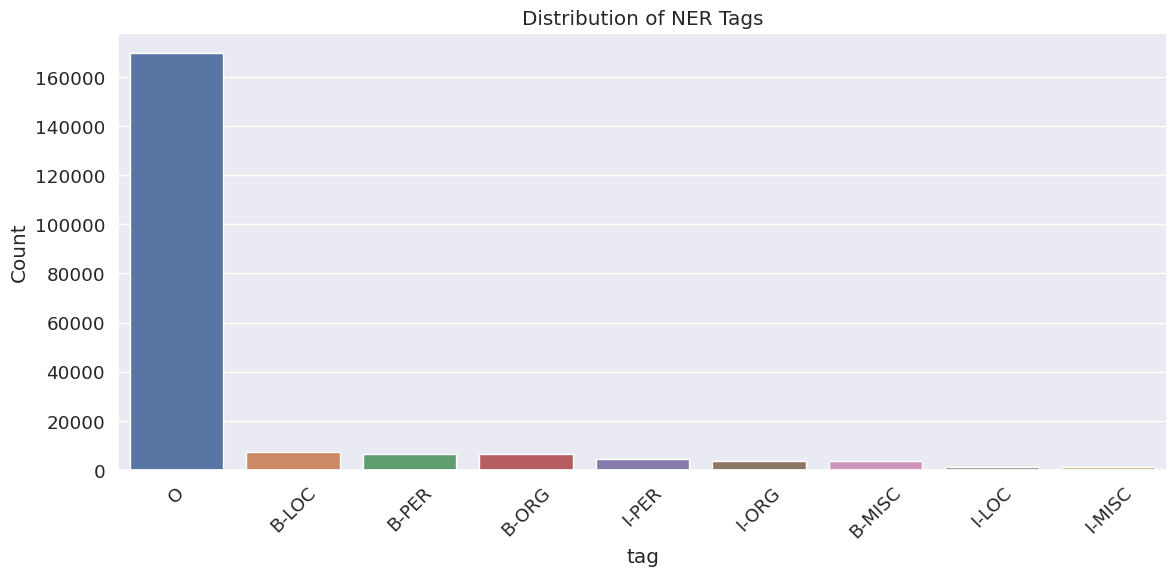

In [5]:
# Convert to DataFrame for easier analysis
def ner_to_df(dataset_split):
    data = []
    for example in dataset_split:
        for token, tag in zip(example['tokens'], example['ner_tags']):
            data.append({'token': token, 'tag_id': tag})
    return pd.DataFrame(data)

ner_train_df = ner_to_df(ner_dataset['train'])

# Map numeric tags to their string representations
tag_names = ner_dataset['train'].features['ner_tags'].feature.names
ner_train_df['tag'] = ner_train_df['tag_id'].map(lambda x: tag_names[x])

# Visualize tag distribution
plt.figure(figsize=(12, 6))
tag_counts = ner_train_df['tag'].value_counts()
sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.title('Distribution of NER Tags')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Text Classification Dataset Analysis


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


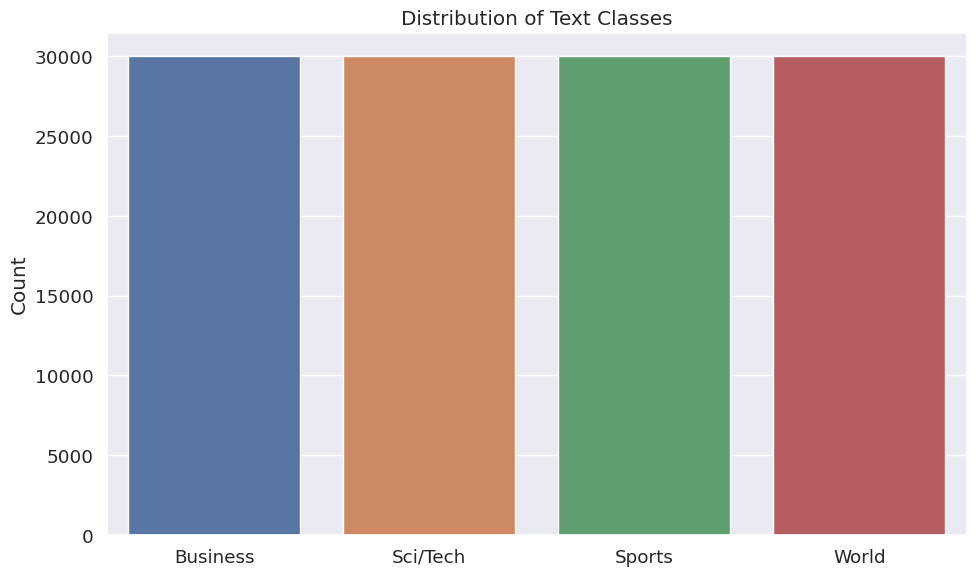

In [6]:
# Get class names
class_names = text_classification_dataset['train'].features['label'].names

# Count examples per class
class_counts = Counter(text_classification_dataset['train']['label'])
class_distribution = {class_names[k]: v for k, v in class_counts.items()}

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Distribution of Text Classes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Text Length Analysis


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


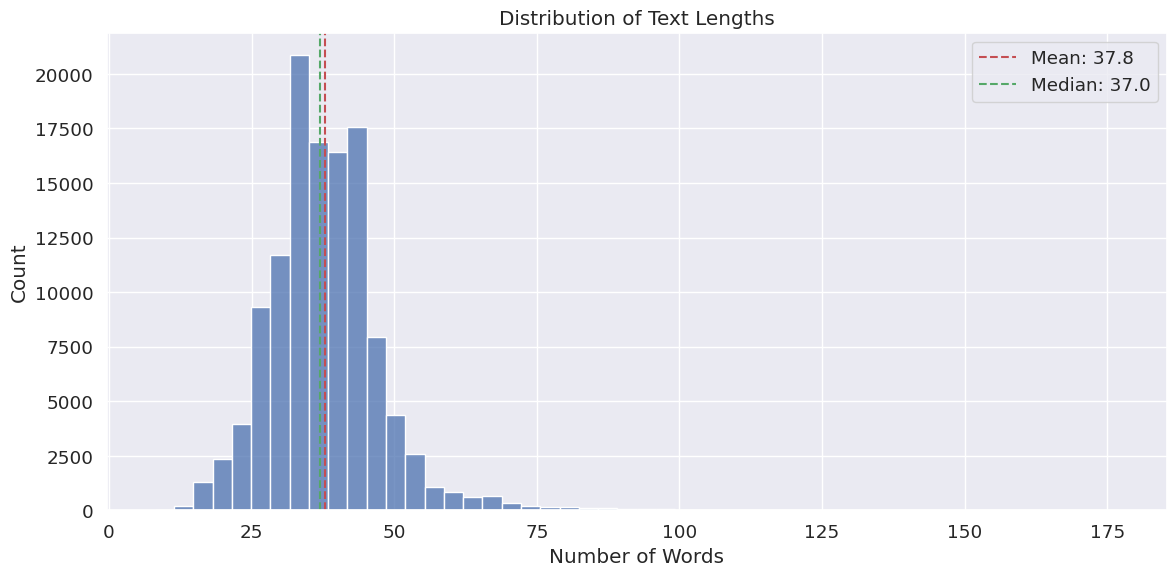

In [7]:
text_lengths = [len(text.split()) for text in text_classification_dataset['train']['text']]
plt.figure(figsize=(12, 6))
sns.histplot(text_lengths, bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.axvline(np.mean(text_lengths), color='r', linestyle='--', label=f'Mean: {np.mean(text_lengths):.1f}')
plt.axvline(np.median(text_lengths), color='g', linestyle='--', label=f'Median: {np.median(text_lengths):.1f}')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Sample Visualization


In [9]:
# Display a sample NER example with tags
def visualize_ner_sample(example_idx=1):
    example = ner_dataset['train'][example_idx]
    tokens = example['tokens']
    tags = [tag_names[tag] for tag in example['ner_tags']]
    
    print("Sample NER annotation:")
    for token, tag in zip(tokens, tags):
        if tag != 'O':
            print(f"{token} -> {tag}")
    
    # Full sentence with highlighting
    print("\nFull sentence:")
    current_tag = None
    sentence = []
    for token, tag in zip(tokens, tags):
        if tag != 'O' and tag != current_tag:
            sentence.append(f"[{tag}] {token}")
            current_tag = tag
        elif tag != 'O' and tag == current_tag:
            sentence.append(token)
            current_tag = tag
        else:
            sentence.append(token)
            current_tag = None
    print(" ".join(sentence))

visualize_ner_sample()

Sample NER annotation:
Peter -> B-PER
Blackburn -> I-PER

Full sentence:
[B-PER] Peter [I-PER] Blackburn


In [11]:
# Display a sample text classification example
def visualize_text_sample(example_idx=1):
    example = text_classification_dataset['train'][example_idx]
    text = example['text']
    label = class_names[example['label']]
    
    print(f"Class: {label}")
    print(f"Text: {text}")

visualize_text_sample()

Class: Business
Text: Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
